In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Load the dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

# Data Cleaning
# Check for missing values

In [3]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Remove duplicates

In [4]:
data = data.drop_duplicates()

# Normalize numerical features

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('quality', axis=1))

# Convert back to DataFrame

In [6]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
data_scaled['quality'] = data['quality'].values

# Histogram

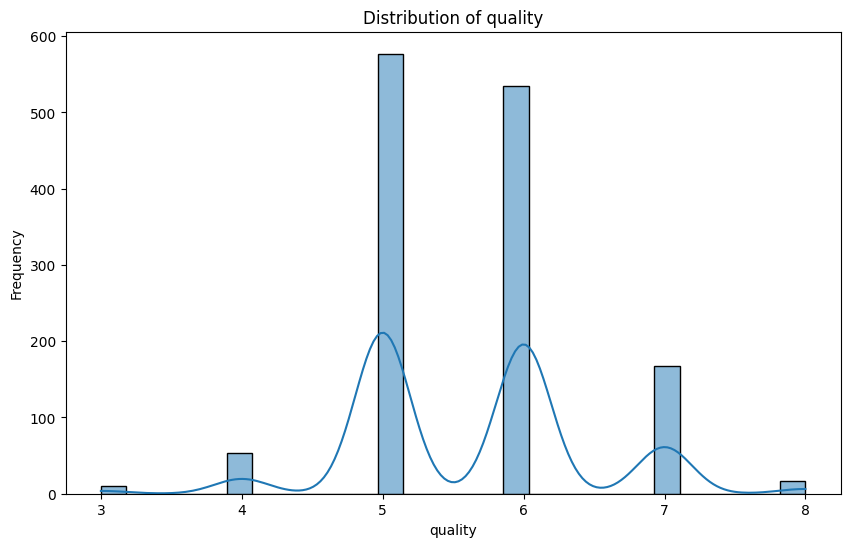

In [41]:
def plot_histogram(data, column):
    """
    Plots a histogram of the specified column in the dataset.

    Parameters:
    data (DataFrame): The dataset containing the column to plot.
    column (str): The name of the column to plot.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# Generate the histogram
plot_histogram(data, 'quality')


# Scatter Plot

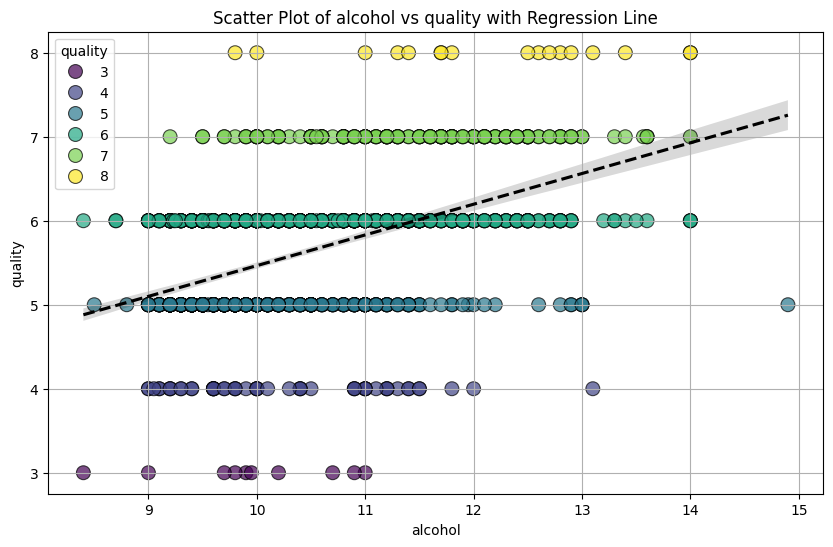

In [7]:
def plot_scatter_v2(data, x_column, y_column):
    """
    Plots a scatter plot of the specified x and y columns from the dataset with a different design.

    Parameters:
    data (DataFrame): The dataset containing the data to plot.
    x_column (str): The name of the column to use for the x-axis.
    y_column (str): The name of the column to use for the y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, alpha=0.7, hue=y_column, palette='viridis', s=100, edgecolor='k', marker='o')
    sns.regplot(data=data, x=x_column, y=y_column, scatter=False, color='black', line_kws={'linestyle':'--'})
    plt.title(f'Scatter Plot of {x_column} vs {y_column} with Regression Line')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

# Assuming you have a DataFrame named 'data'
# Generate the scatter plot with a different design for 'alcohol' vs 'quality'
plot_scatter_v2(data, 'alcohol', 'quality')


# Heatmap

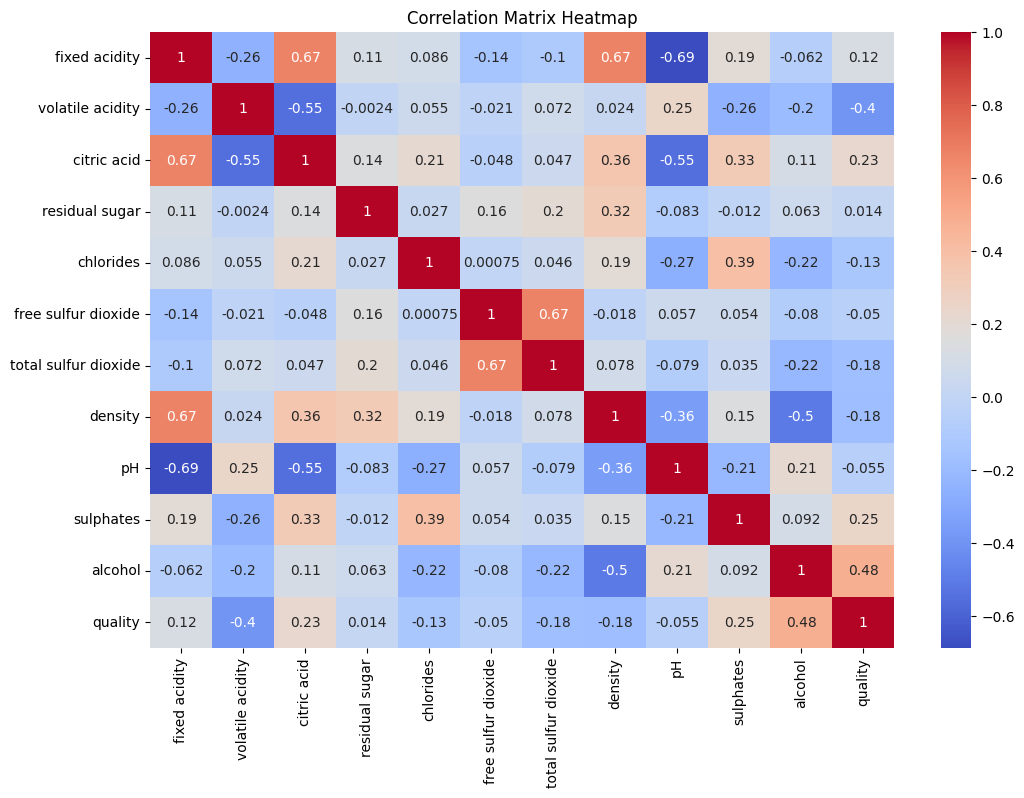

In [39]:
def plot_heatmap(data):
    """
    Plots a heatmap of the correlation matrix for the dataset.

    Parameters:
    data (DataFrame): The dataset to calculate the correlation matrix for.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
# Generate the heatmap
plot_heatmap(data)

# Elbow Plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

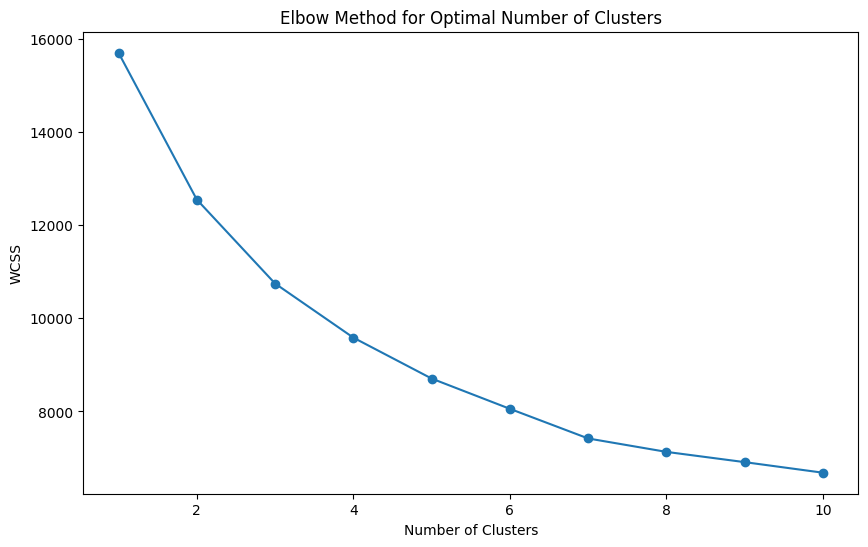

In [38]:
def plot_elbow(data):
    """
    Plots the elbow method to determine the optimal number of clusters for k-means clustering.

    Parameters:
    data (DataFrame): The dataset to use for k-means clustering.

    Returns:
    None
    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()
# Generate the elbow plot
plot_elbow(data_scaled.drop('quality', axis=1))


# K-Means Clustering

In [24]:
def perform_kmeans(data, n_clusters):
    """
    Performs k-means clustering on the dataset.

    Parameters:
    data (DataFrame): The dataset to cluster.
    n_clusters (int): The number of clusters to form.

    Returns:
    array: The cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(data)
# Perform k-means clustering
clusters = perform_kmeans(data_scaled, 3)
data['Cluster'] = clusters
print(clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 1 ... 1 1 1]


# Cluster Scatter Plot

In [25]:
def plot_clustered_scatter(data, x_column, y_column):
    """
    Plots a scatter plot of the specified x and y columns from the dataset with clusters.

    Parameters:
    data (DataFrame): The dataset containing the data to plot.
    x_column (str): The name of the column to use for the x-axis.
    y_column (str): The name of the column to use for the y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue='Cluster', palette='viridis', alpha=0.6, edgecolor=None)
    plt.title(f'Clustered Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend(title='Cluster')
    plt.show()

Generate clustered scatter plot

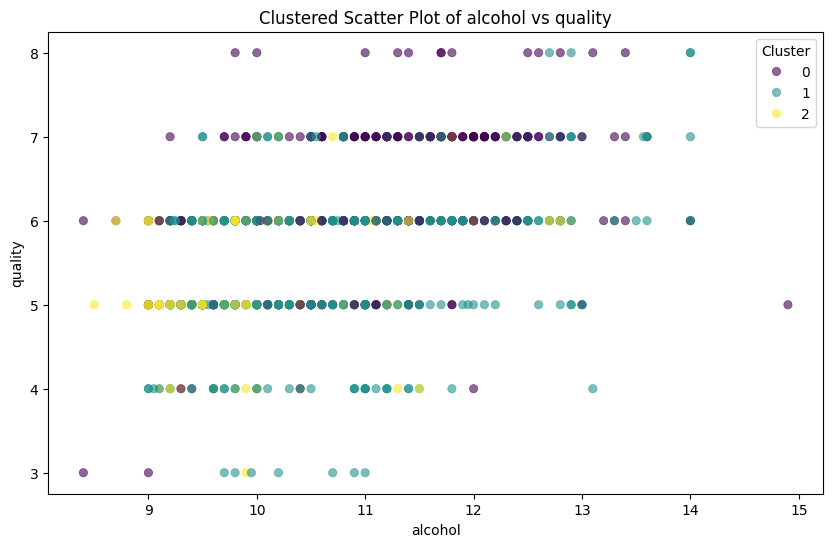

In [26]:
plot_clustered_scatter(data, 'alcohol', 'quality')

# Linear Regression

In [12]:
def perform_linear_regression(data, x_column, y_column):
    """
    Performs linear regression on the dataset.

    Parameters:
    data (DataFrame): The dataset to use for regression.
    x_column (str): The name of the column to use as the predictor.
    y_column (str): The name of the column to use as the response.

    Returns:
    model: The fitted linear regression model.
    float: The R-squared value.
    float: The mean squared error.
    """
    X = data[[x_column]]
    y = data[y_column]
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    return model, r2, mse
# Perform linear regression
model, r2, mse = perform_linear_regression(data_scaled.copy(), 'alcohol', 'quality')
print(f'R-squared: {r2}, Mean Squared Error: {mse}')

R-squared: 0.23072929966095168, Mean Squared Error: 0.5213975431074415


# Scatter plot with linear regression fitting

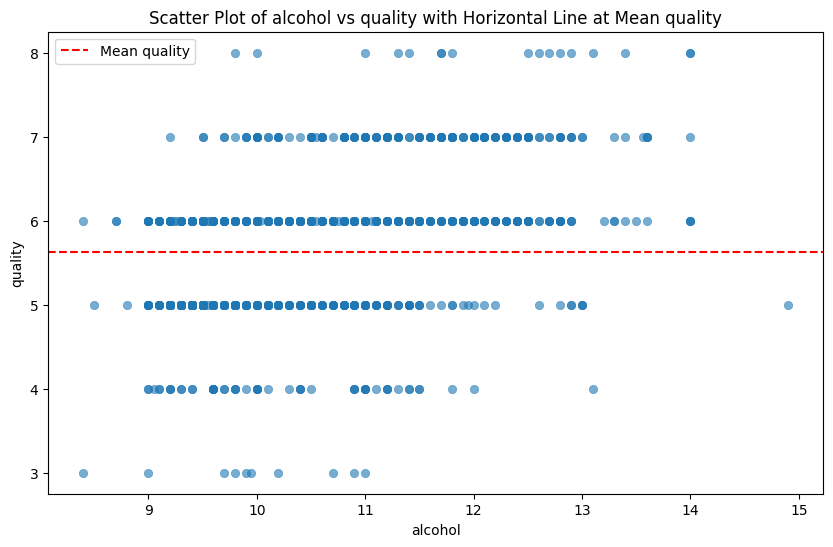

In [13]:
def plot_regression_line(data, x_column, y_column, model):
    """
    Plots the scatter plot of the data along with a horizontal line at the mean of y.

    Parameters:
    data (DataFrame): The dataset containing the data to plot.
    x_column (str): The name of the column to use for the x-axis.
    y_column (str): The name of the column to use for the y-axis.
    model (LinearRegression): The fitted linear regression model.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, alpha=0.6, edgecolor=None)

    # Calculate the mean of the y_column
    y_mean = data[y_column].mean()

    # Plot the horizontal line at the mean value of y
    plt.axhline(y=y_mean, color='red', linestyle='--', label=f'Mean {y_column}')

    plt.title(f'Scatter Plot of {x_column} vs {y_column} with Horizontal Line at Mean {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()
# Plot the regression line
plot_regression_line(data, 'alcohol', 'quality', model)

# Calculate the statistical summarytext

In [31]:
summary_stats = data.describe().T

# Calculate additional metrics: Skewness, Kurtosis, and Median
summary_stats['Skewness'] = data.skew()
summary_stats['Kurtosis'] = data.kurtosis()
summary_stats['Median'] = data.median()

# Reorder and rename columns for clarity
summary_stats = summary_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': '25%',
    '50%': '50%',
    '75%': '75%',
    'max': 'Max'
})

# Select and reorder the columns
summary_stats = summary_stats[['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis', 'Median']]

# Display the comprehensive summary
print(summary_stats)

                       Count       Mean    Std Dev      Min      25%      50%  \
fixed acidity         1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
volatile acidity      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
citric acid           1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
residual sugar        1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
chlorides             1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
free sulfur dioxide   1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
total sulfur dioxide  1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
density               1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
pH                    1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
sulphates             1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
alcohol               1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
quality               1359.0